In [1]:
# import functions from ../definitions/definitions_EDA
import sys
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
sys.path.append('../definitions')
import definitions_EDA as eda
# import definitions_plotting as def_plot
from pandas.plotting import autocorrelation_plot
import gc
import scipy as sp
from matplotlib.colors import LogNorm


Define Variables

In [2]:
start_date = pd.Timestamp('2024-03-22')
end_date = pd.Timestamp('2024-03-23')
RECORDS_PER_DAY = 431996

Fetch data and store as dataframe (data ingestion)

Number of observations per day: 
 DateTime
2024-03-22    161998
2024-03-23    314396
2024-03-24    269998
2024-03-25    117600
Freq: D, dtype: int64
 
 Shape of dataframe (50000, 5)
 
Number of days data = Total records 50000 / records per day 431996 = 0.11574181242418911 
 
Head of dataframe: 
                          NS_SQUID  Z_SQUID  NS_Fluxgate  EW_Fluxgate  Z_Fluxgate
DateTime                                                                        
2024-03-24 05:30:40.900    0.0209 -58.0447   10940.8574     -67.7620 -22675.5801
2024-03-24 05:30:41.100    0.0199 -58.0336   10940.8574     -67.7620 -22675.5801
2024-03-24 05:30:41.290    0.0150 -58.0325   10940.8461     -67.8818 -22675.4912
2024-03-24 05:30:41.490    0.0159 -58.0366   10940.8458     -68.1014 -22675.5097
2024-03-24 05:30:41.690    0.0150 -58.0361   10940.8458     -68.1014 -22675.5097


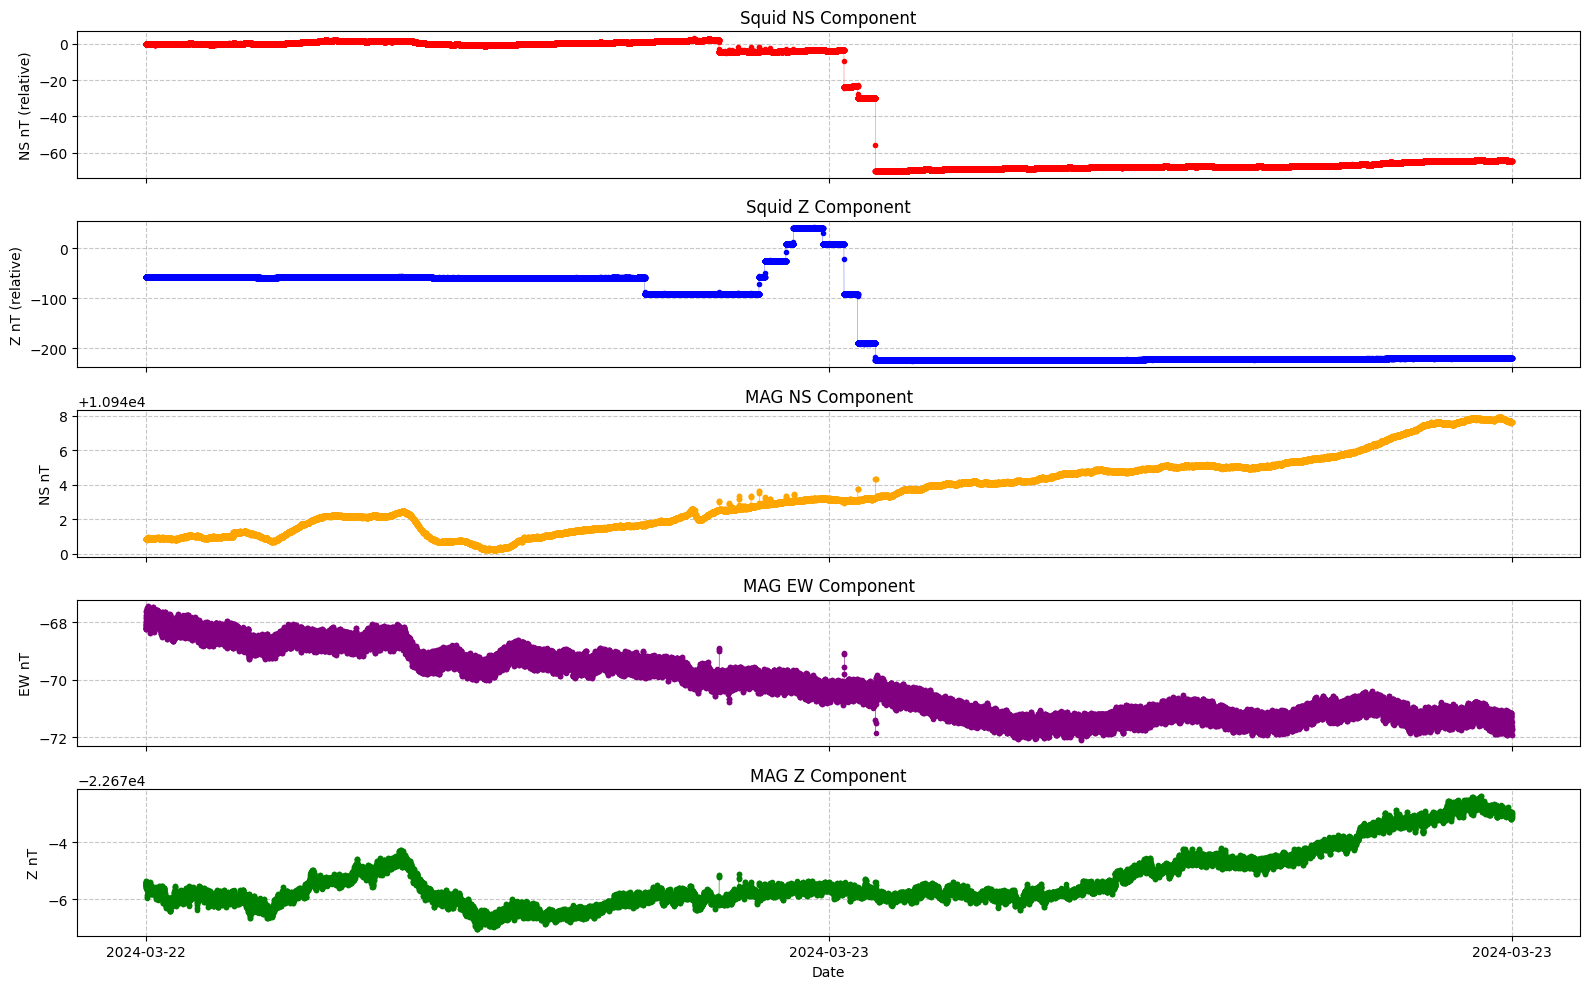

In [3]:
df = eda.get_data(eda.read_txt_file, start_date, end_date)
observations_per_day = df.resample('D').size()
df = df.iloc[350000:400000, :] # Select some subset of data
# df = df.astype({'NS_SQUID': 'float32', 'Z_SQUID': 'float32', 'NS_Fluxgate': 'float32', 'EW_Fluxgate': 'float32', 'Z_Fluxgate': 'float32'})
print(f"Number of observations per day: \n",observations_per_day)
print(f' \n Shape of dataframe', df.shape)
print(f' \nNumber of days data = Total records {df.shape[0]} / records per day {RECORDS_PER_DAY} = {df.shape[0]/RECORDS_PER_DAY} ')
print(f' \nHead of dataframe: \n', df.head().to_string(index=True))
eda.generateDataPlots(df['NS_SQUID'].values, df['Z_SQUID'].values, df['NS_Fluxgate'].values, df['EW_Fluxgate'].values, df['Z_Fluxgate'].values, len(df), RECORDS_PER_DAY, start_date, end_date)

# Scale SQUID data

Determine the Offset (Baseline)

Define Quiet Period

In [4]:
# start_date_quiet = '2024-03-26'
# end_date_quiet = '2024-03-31'

# data_arr_mag = eda.process_data(eda.get_data('ctumag', eda.read_txt_file, start_date_quiet, end_date_quiet))
# data_arr_squid = eda.process_data(eda.get_data('squid', eda.read_txt_file, start_date_quiet, end_date_quiet))
# df_quiet = eda.create_dataframe(data_arr_mag, data_arr_squid, start_date_quiet)
# df_quiet = df_quiet.astype({'NS_SQUID': 'float32', 'Z_SQUID': 'float32', 'NS_Fluxgate': 'float32', 'EW_Fluxgate': 'float32', 'Z_Fluxgate': 'float32'})
# del data_arr_mag, data_arr_squid
# gc.collect()
# # df = df.between_time('12:30:00', '13:30:00') # Select only a small subset of the data for analysis
# # print(f' \n Shape of df', df.shape)
# print(f' \nNumber of days data = Total records {df_quiet.shape[0]} / records per day (431998) = {df_quiet.shape[0]/431998} ')
# print(f' \nHead of dataframe: \n', df_quiet.head().to_string(index=True))


Calculate offset

In [5]:
# columns  = ["NS_SQUID","Z_SQUID"]
# for column in df_quiet.columns:
#     feature_mean = df_quiet[column].mean()


# Standardise the dataset

Using Z-Score

New head after standardize
                          NS_SQUID   Z_SQUID  NS_Fluxgate  EW_Fluxgate  \
DateTime                                                                
2024-03-24 05:30:40.900  0.971264  0.912825    -1.215195     2.094727   
2024-03-24 05:30:41.100  0.971234  0.912956    -1.215195     2.094727   
2024-03-24 05:30:41.290  0.971086  0.912969    -1.220623     1.988614   
2024-03-24 05:30:41.490  0.971113  0.912921    -1.220767     1.794104   
2024-03-24 05:30:41.690  0.971086  0.912926    -1.220767     1.794104   

                         Z_Fluxgate  
DateTime                             
2024-03-24 05:30:40.900   -0.257186  
2024-03-24 05:30:41.100   -0.257186  
2024-03-24 05:30:41.290   -0.168378  
2024-03-24 05:30:41.490   -0.186859  
2024-03-24 05:30:41.690   -0.186859  
Shape after normalisation (50000, 5)


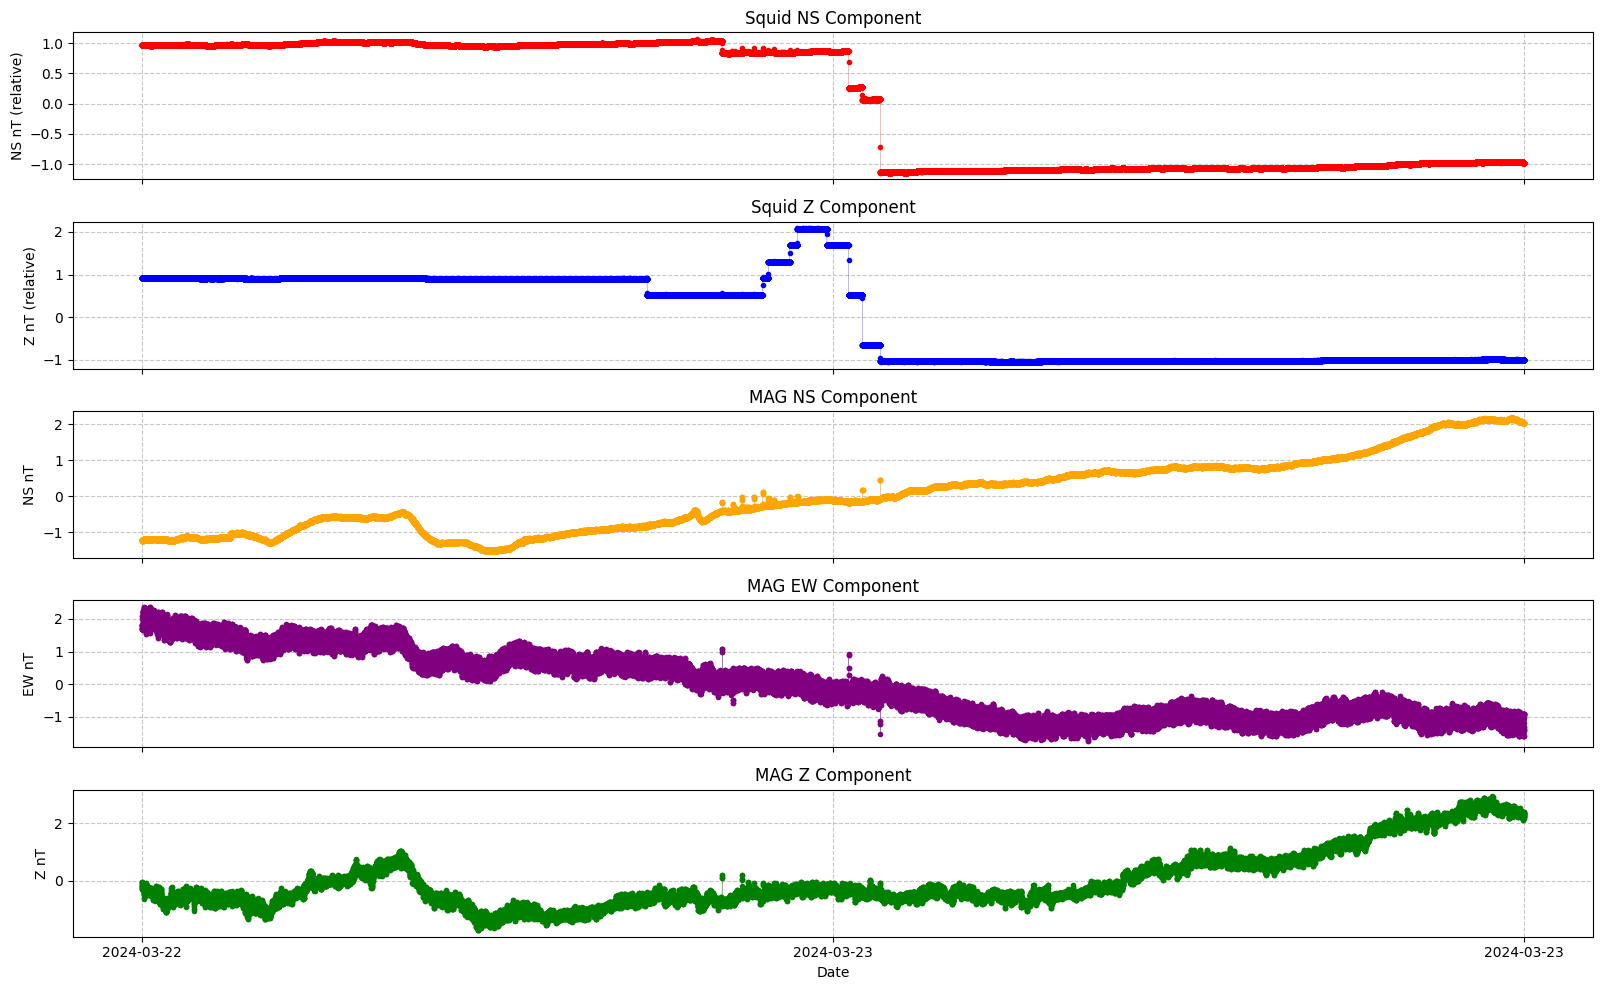

In [6]:
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

print(f'New head after standardize\n', df.head())
print(f"Shape after normalisation", df.shape)
eda.generateDataPlots(df['NS_SQUID'].values, df['Z_SQUID'].values, df['NS_Fluxgate'].values, df['EW_Fluxgate'].values, df['Z_Fluxgate'].values, len(df), RECORDS_PER_DAY, start_date, end_date)

### Check for missing values and zero values

In [7]:
for column in df.columns:
    print(f"\n Number of missing values in {column} is: ", df[column].isna().sum())
    print(f"Nmber of zeros in {column} is: ", (df[column] == 0).sum())


 Number of missing values in NS_SQUID is:  0
Nmber of zeros in NS_SQUID is:  0

 Number of missing values in Z_SQUID is:  0
Nmber of zeros in Z_SQUID is:  0

 Number of missing values in NS_Fluxgate is:  0
Nmber of zeros in NS_Fluxgate is:  0

 Number of missing values in EW_Fluxgate is:  0
Nmber of zeros in EW_Fluxgate is:  0

 Number of missing values in Z_Fluxgate is:  0
Nmber of zeros in Z_Fluxgate is:  0


### Outlier Test

Z score test

 
 Shape of df before removing outliers (50000, 5)
                         NS_SQUID   Z_SQUID  NS_Fluxgate  EW_Fluxgate  \
DateTime                                                                
2024-03-24 05:30:40.900  0.971274  0.912834     1.215207     2.094748   
2024-03-24 05:30:41.100  0.971244  0.912965     1.215207     2.094748   
2024-03-24 05:30:41.290  0.971096  0.912978     1.220635     1.988634   
2024-03-24 05:30:41.490  0.971123  0.912930     1.220780     1.794122   
2024-03-24 05:30:41.690  0.971096  0.912936     1.220780     1.794122   
...                           ...       ...          ...          ...   
2024-03-24 13:28:39.960  0.975911  0.995946     2.044548     1.571138   
2024-03-24 13:28:40.160  0.976044  0.995790     2.039168     1.404792   
2024-03-24 13:28:40.360  0.976117  0.995509     2.039168     1.404792   
2024-03-24 13:28:40.560  0.976132  0.995568     2.036622     1.369716   
2024-03-24 13:28:40.760  0.976159  0.995637     2.034892     1.196019   


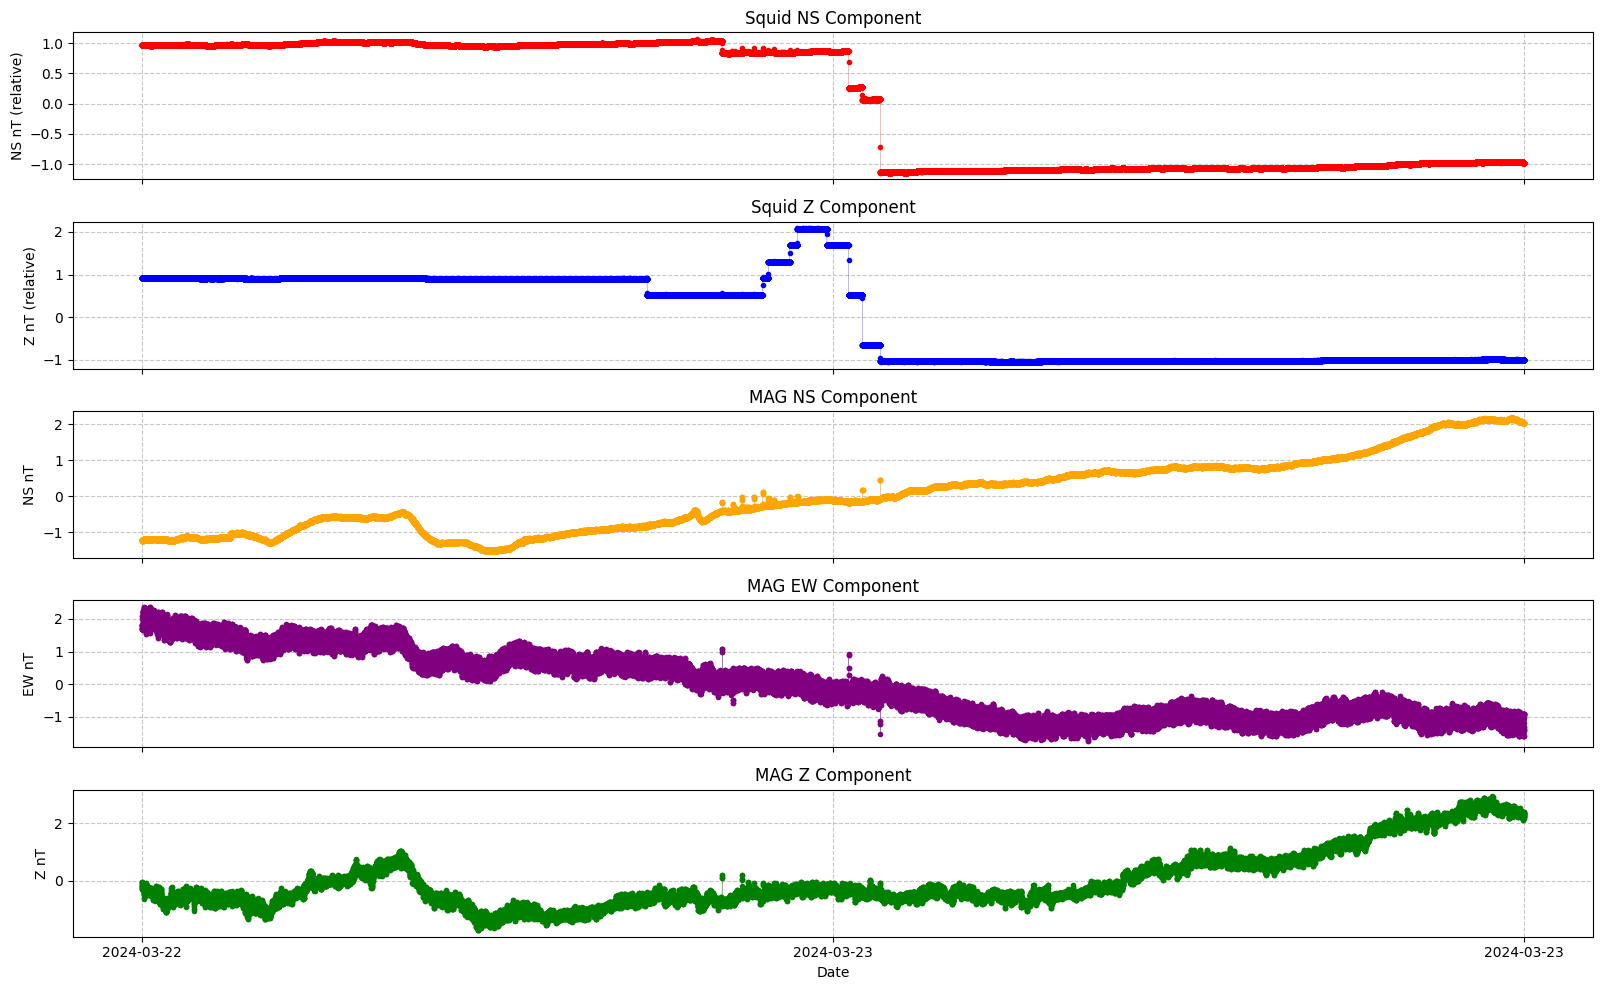

In [8]:
print(f' \n Shape of df before removing outliers', df.shape)
outliers_removed_z = eda.z_score_test(df)
print(f' \n Shape of df after removing outliers', outliers_removed_z.shape)
print(f'\nProportion of data removed:', (1-outliers_removed_z.shape[0]/df.shape[0])*100, '%')
del df
gc.collect()
eda.generateDataPlots(outliers_removed_z['NS_SQUID'].values, outliers_removed_z['Z_SQUID'].values, outliers_removed_z['NS_Fluxgate'].values, outliers_removed_z['EW_Fluxgate'].values, outliers_removed_z['Z_Fluxgate'].values,len(outliers_removed_z), RECORDS_PER_DAY, start_date, end_date)

### Fix sudden jumps or drops in the data

As we can see there are severe drops in the squid data. Lets fix these

Found 6 spikes in column 'NS_SQUID'.
Found 12 spikes in column 'Z_SQUID'.
Found 20 spikes in column 'NS_Fluxgate'.
No spikes detected in column 'EW_Fluxgate'.
Found 1 spikes in column 'Z_Fluxgate'.


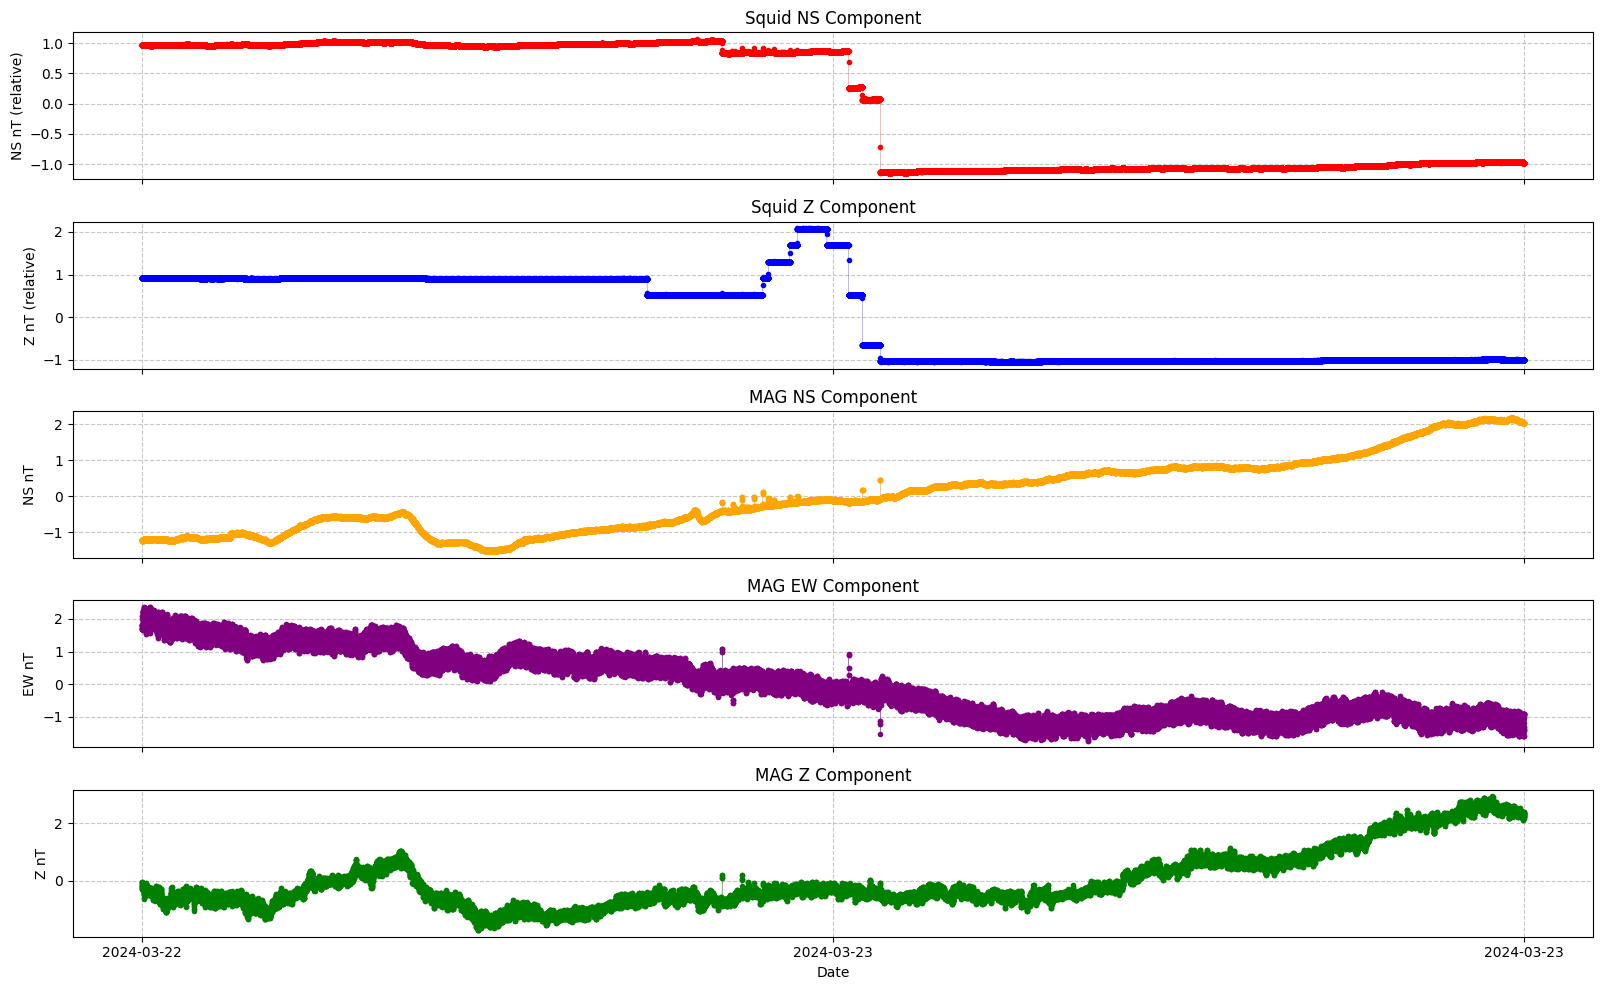

In [9]:
corrected_df_ns = eda.detect_spikes_and_correct(outliers_removed_z, "NS_SQUID")
corrected_df_f = eda.detect_spikes_and_correct(corrected_df_ns, "Z_SQUID")
corrected_df_nf = eda.detect_spikes_and_correct(corrected_df_f, "NS_Fluxgate")
corrected_df_ew = eda.detect_spikes_and_correct(corrected_df_nf, "EW_Fluxgate")
corrected_df = eda.detect_spikes_and_correct(corrected_df_ew, "Z_Fluxgate")
del outliers_removed_z, corrected_df_ns, corrected_df_f, corrected_df_nf, corrected_df_ew
gc.collect()
eda.generateDataPlots(corrected_df['NS_SQUID'].values, corrected_df['Z_SQUID'].values, corrected_df['NS_Fluxgate'].values, corrected_df['EW_Fluxgate'].values, corrected_df['Z_Fluxgate'].values, len(corrected_df), RECORDS_PER_DAY, start_date, end_date)

# Feature Generation

Now add the H component

In [ ]:
h_component = np.sqrt(corrected_df['NS_Fluxgate']**2 + corrected_df['EW_Fluxgate']**2)
corrected_df.loc[:,"H Component"] = h_component
# print(corrected_df)
observations_per_day = corrected_df.resample('D').size()
print(observations_per_day)
# print(f"Shape after feature generation:", corrected_df.shape)

# Now Resample

In [ ]:
resampled_df = pd.DataFrame()
# Resample data for each day
for day in pd.date_range(start_date, end_date, freq='D'):
  resampled_data = eda.resample_time_series(corrected_df, day, day + pd.Timedelta(days=1)).dropna()
  # Do something with the resampled data, e.g., save to a file
  resampled_data.to_csv(f'/Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Data/SEC DATA/{day.strftime("%Y-%m-%d")}.csv')
  print(f"The shape of day ",day, " in the data is: ", resampled_data.shape, "after resampling")
  resampled_df = pd.concat([resampled_df, resampled_data])  


print(f"This is the new resampled dataframe\n", resampled_df.head())
eda.generateDataPlots(resampled_df['NS_SQUID'].values, resampled_df['Z_SQUID'].values, resampled_df['NS_Fluxgate'].values, resampled_df['EW_Fluxgate'].values, resampled_df['Z_Fluxgate'].values, len(resampled_df), RECORDS_PER_DAY, start_date, end_date)


Test for stationarity

In [ ]:
eda.perform_dickey_fuller_test(resampled_df)

Test for seasonality and trend

In [ ]:
eda.test_stationarity(corrected_df)

Now using the autocorrelation_plot

In [ ]:
# Draw Plot
for column in resampled_df.columns:
    plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
    autocorrelation_plot(resampled_df[column].tolist())
    plt.title(f'Autocorrelation for {column}')
    plt.show()  # Display the plot

Fourier Transform

In [ ]:
components, fourier_results = eda.calculate_fourier_transforms(df)
eda.plot_fourier_transform(fourier_results, components)

Create PDF of each feature

In [ ]:
import seaborn as sns

for column in resampled_df.columns:
    sns.displot(resampled_df[column], kde=True)

Perform Decomposition

In [ ]:
# Additive Decomposition
# result_add = seasonal_decompose(df['Z_Fluxgate'], model='additive', extrapolate_trend='freq')

# Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

Waterfall plots

In [ ]:
# Assume you have a signal 'sig' sampled at regular intervals ('time_step')
sig = resampled_data["H Component"].to_numpy()
sig_fft = sp.fft.fft(sig)
power = np.abs(sig_fft) ** 2
sample_freq = sp.fft.fftfreq(sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")

# Find the peak frequency
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title("Peak frequency")
plt.plot(freqs[:8], power[pos_mask][:8])
plt.setp(axes, yticks=[])


In [ ]:
print(resampled_df)
# Function to plot waterfall FFT for each component
def plot_waterfall(df, fs=1/60):
    nfft = 256  # Length of each segment
    noverlap = 128  # Overlap between segments

    for column in df.columns:
        signal = df[column].values
        plt.figure()
        plt.specgram(signal, NFFT=nfft, Fs=fs, noverlap=noverlap, cmap='viridis',norm=LogNorm())
        plt.title(f'Waterfall FFT Plot for {column}')
        plt.xlabel('Time [s]')
        plt.ylabel('Frequency [Hz]')
        plt.colorbar(label='Intensity [dB]')
        plt.show()

# Plot the waterfall FFT for each component
plot_waterfall(resampled_df)